Reading the data from source, storing the data into dataframe and sorting the dataframe by Fare

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# reading the data from the file
df_titanic = pd.read_csv("titanic.csv")
# sorting the dataframe by Fare
df_titanic.sort_values(by=['Fare'], inplace=True)
# reseting the index of the dataframe based on sort
df_titanic.reset_index(drop=True, inplace=True)
df_titanic.head(20)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,2,Mr. Francis Parkes,male,21.0,0,0,0.0000
1,0,2,Mr. Anthony Wood Frost,male,37.0,0,0,0.0000
2,0,2,Mr. Alfred Fleming Cunningham,male,22.0,0,0,0.0000
3,0,3,Mr. Alfred Johnson,male,49.0,0,0,0.0000
4,0,1,Mr. William Henry Marsh Parr,male,30.0,0,0,0.0000
5,0,3,Mr. William Cahoone Jr Johnson,male,19.0,0,0,0.0000
6,0,2,Mr. Ennis Hastings Watson,male,19.0,0,0,0.0000
7,1,3,Mr. William Henry Tornquist,male,25.0,0,0,0.0000
8,0,1,Mr. William Harrison,male,40.0,0,0,0.0000
9,0,2,Mr. Robert J Knight,male,41.0,0,0,0.0000


Studying statistical data

In [204]:
df_titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


    Observations:
        1) The minimum fare was 0
        2) The maximum fare was 512.3292
        3) The average age of the passengers was 29

Inspecting the survival count

In [206]:
df_titanic['Survival'] = df_titanic.Survived.map({0:'Died', 1:'Survived'})
df_titanic['Survival'] = df_titanic.Survived.map({0:'Died', 1:'Survived'})
df_titanic['Survival'].value_counts()

Died        545
Survived    342
Name: Survival, dtype: int64

Inspecting the fare distribution

In [207]:
df_titanic['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     36
7.7500     33
26.0000    31
           ..
13.7917     1
75.2500     1
39.4000     1
6.9500      1
8.5167      1
Name: Fare, Length: 248, dtype: int64

Studying the survival rate for each Fare

In [208]:
# creating a column countSurvived grouped by Fare which represents the number of passengers survived
df11 = df_titanic.groupby('Fare')['Survived'].apply(lambda x: (x==1).sum()).reset_index(name='countSurvived')
# creating a column countDied grouped by Fare which represents the number of passengers died
df12 = df_titanic.groupby('Fare')['Survived'].apply(lambda x: (x==0).sum()).reset_index(name='countDied')
# creating a column totalCount grouped by Fare which represents the total number of passengers 
df13 = df_titanic.groupby('Fare')['Survived'].count().reset_index(name='totalCount')


df14 = df11.merge(df12, on='Fare', how='inner')

dfResult = df13.merge(df14, on='Fare', how='inner')
dfResult['Survival_Rate'] = dfResult['countSurvived']/dfResult['totalCount']
dfResult

,Fare,totalCount,countSurvived,countDied,Survival_Rate
0,0.0000,15,1,14,0.066667
1,4.0125,1,0,1,0.000000
2,5.0000,1,0,1,0.000000
3,6.2375,1,0,1,0.000000
4,6.4375,1,0,1,0.000000
...,...,...,...,...,...
243,227.5250,4,3,1,0.750000
244,247.5208,2,1,1,0.500000
245,262.3750,2,2,0,1.000000
246,263.0000,4,2,2,0.500000


Calculating Average Fare and Survival Rate

In [210]:
# creating ranges for the fare values
bins = [-1, 0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
names = ['<=0', '0 To 50', '50 To 100', '100 To 150', '150 To 200', '200 To 250', '250 To 300', '300 To 350', '350 To 400', '400 To 450', '450 To 500','500 To 550']

df_titanic['Fare-Range'] = pd.cut(df_titanic['Fare'], bins, labels=names)
df_titanic['Fare-Range'] = df_titanic['Fare-Range'].astype(str)

df_titanic['Survival_Rate'] = df_titanic.groupby('Fare-Range')['Survived'].transform('mean')
df_titanic['Average_Fare'] = df_titanic.groupby('Fare-Range')['Fare'].transform('mean')

df_titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survival,Fare-Range,Survival_Rate,Average_Fare
0,0,2,Mr. Francis Parkes,male,21.0,0,0,0.0000,Died,<=0,0.066667,0.000000
1,0,2,Mr. Anthony Wood Frost,male,37.0,0,0,0.0000,Died,<=0,0.066667,0.000000
2,0,2,Mr. Alfred Fleming Cunningham,male,22.0,0,0,0.0000,Died,<=0,0.066667,0.000000
3,0,3,Mr. Alfred Johnson,male,49.0,0,0,0.0000,Died,<=0,0.066667,0.000000
4,0,1,Mr. William Henry Marsh Parr,male,30.0,0,0,0.0000,Died,<=0,0.066667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,1,Mr. Charles Alexander Fortune,male,19.0,3,2,263.0000,Died,250 To 300,0.666667,262.791667
883,1,1,Miss. Alice Elizabeth Fortune,female,24.0,3,2,263.0000,Survived,250 To 300,0.666667,262.791667
884,1,1,Mr. Gustave J Lesurer,male,35.0,0,0,512.3292,Survived,500 To 550,1.000000,512.329200
885,1,1,Miss. Anna Ward,female,35.0,0,0,512.3292,Survived,500 To 550,1.000000,512.329200


Plotting Survival Rate vs Fare Range


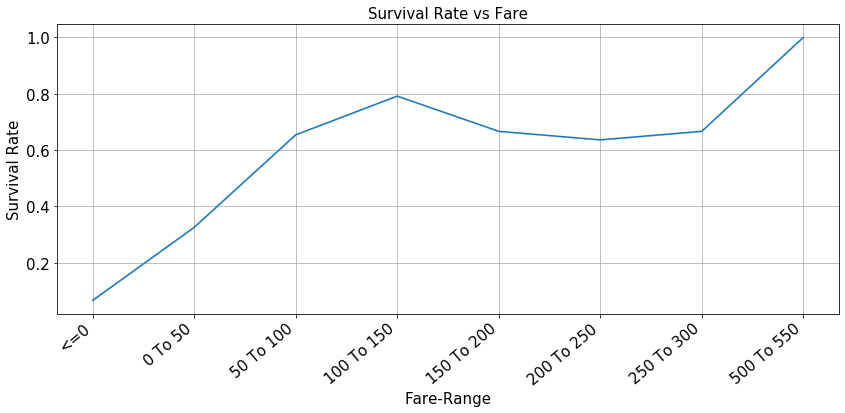

In [211]:
plt.figure(figsize=(12, 6))
# line plot with "Fare-Range" in x-axis and "Survival_Rate" in y-axis
ax=sns.lineplot(x="Fare-Range", y="Survival_Rate", data = df_titanic, sort=False)

ax.set_xticklabels(df_titanic['Fare-Range'].unique(), rotation=40, ha="right", fontsize=15)
# Setting font-size, label-size 
rc={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
plt.rcParams.update(**rc)
# Setting title
plt.title('Survival Rate vs Fare')
# Setting y-axis label
plt.ylabel('Survival Rate')
plt.tight_layout()
# Enabling grid lines
plt.gca().grid(True)

plt.show()

Plotting Survival Rate vs Average Fare

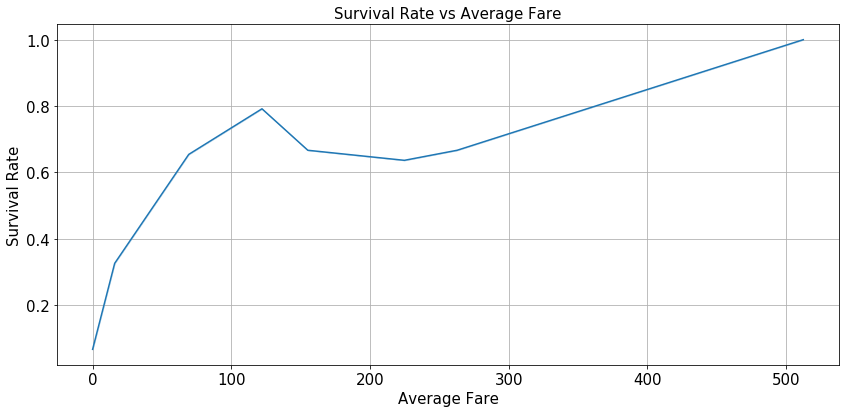

In [212]:
plt.figure(figsize=(12, 6))
# line plot with "Average_Fare" in x-axis and "Survival_Rate" in y-axis
ax=sns.lineplot('Average_Fare','Survival_Rate',data=df_titanic)


# Setting font-size, label-size 
rc={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
plt.rcParams.update(**rc)
# Setting title
plt.title('Survival Rate vs Average Fare')
# Setting y-axis label
plt.ylabel('Survival Rate')
plt.xlabel('Average Fare')
plt.tight_layout()
# Enabling grid lines
plt.gca().grid(True)

plt.show()


Plotting Count vs Fare


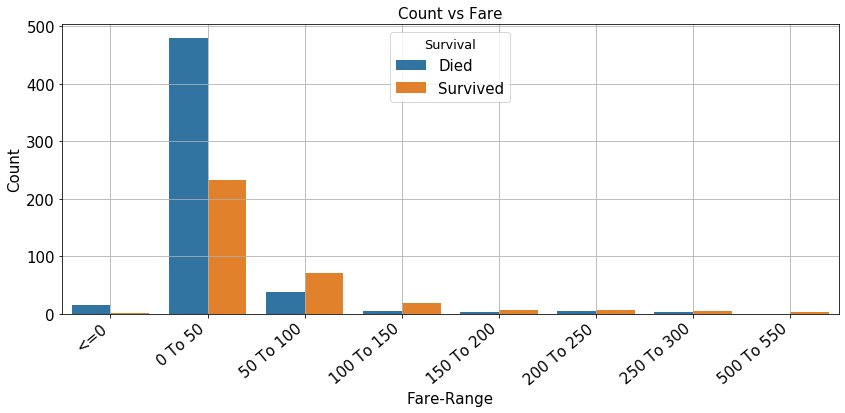

In [213]:
plt.figure(figsize=(12, 6))
df_titanic


ax1 = sns.countplot(x = df_titanic['Fare-Range'], hue=df_titanic['Survival'], data = df_titanic)
ax1.set_xticklabels(df_titanic['Fare-Range'].unique(), rotation=40, ha="right", fontsize=15)
rc1={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
plt.rcParams.update(**rc1)
plt.title('Count vs Fare')
# Set x-axis label
plt.ylabel('Count')
plt.tight_layout()
plt.gca().grid(True)

plt.show()

Scatter plot based on Survival Rate vs Fare

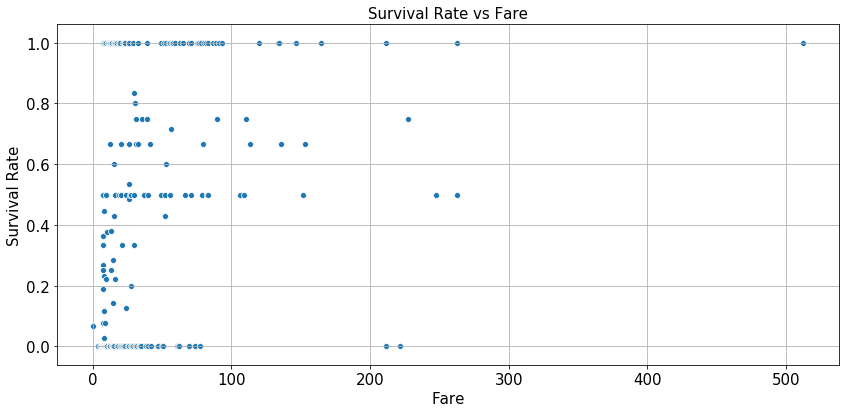

In [215]:
plt.figure(figsize=(12, 6))
ax3 = sns.scatterplot(x = dfResult['Fare'], y=dfResult['Survival_Rate'],  data = dfResult)

rc1={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
plt.rcParams.update(**rc1)
plt.title('Survival Rate vs Fare')
# Set x-axis label
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.gca().grid(True)

plt.show()

lmplot

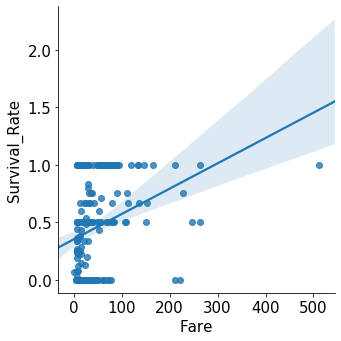

In [216]:
sns.lmplot(x="Fare", y = "Survival_Rate", data = dfResult)

Inspecting data based on Pclass

In [220]:
df_titanic['Class'] = df_titanic.Pclass.map({1:'Upper Class',2:'Middle Class',3:'Lower Class'})
df_titanic['Class'].value_counts()

Lower Class     487
Upper Class     216
Middle Class    184
Name: Class, dtype: int64

In [221]:
df_titanic['Class'].value_counts(normalize = True)

Lower Class     0.549042
Upper Class     0.243517
Middle Class    0.207441
Name: Class, dtype: float64

In [117]:
dfSurvived = dfClass.query("Survived == '1'")
dfSurvived.groupby('Class').mean()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Class,,,,,,
Lower Class,1.0,3.0,21.411092,0.436975,0.420168,13.694887
Middle Class,1.0,2.0,26.170460,0.494253,0.643678,22.055700
Upper Class,1.0,1.0,35.962647,0.492647,0.389706,95.608029


Text(0.5, 1.0, 'count survived vs Class')

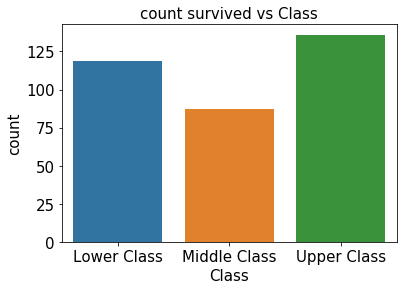

In [124]:
sns.countplot(x="Class", data = dfSurvived)
plt.title('count survived vs Class')

In [118]:
dfDied = dfClass.query("Survived == '0'")
dfDied.groupby('Class').mean()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Class,,,,,,
Lower Class,0.0,3.0,26.410326,0.679348,0.388587,13.711853
Middle Class,0.0,2.0,33.185567,0.319588,0.144330,19.412328
Upper Class,0.0,1.0,43.593750,0.287500,0.300000,64.684007


Text(0.5, 1.0, 'count died vs Class')

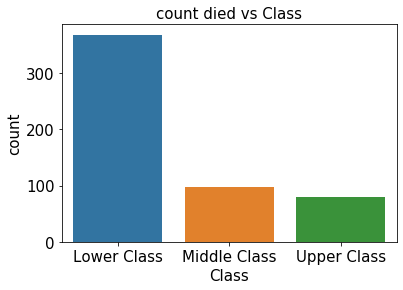

In [125]:
sns.countplot(x="Class", data = dfDied, order=['Lower Class','Middle Class','Upper Class'])
plt.title('count died vs Class')

So, the passengers who paid a higher fare had higher chances of survival.